<a href="https://colab.research.google.com/github/DaniloIto/TCC530_Univesp/blob/main/TCC530_SALA001_GRUPO005_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVESP - TRABALHO DE CONCLUSÃO DE CURSO - TCC**
*TCC530 - SALA001 - GRUPO 005 - CIÊNCIA DE DADOS - 2020*

## 1.0 Carregando as Bibliotecas

In [1]:
import requests
# import warnings
# import time
import pandas as pd
# from pandas.core.common import SettingWithCopyWarning
import numpy as np
import matplotlib.pyplot as plt
# import csv
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler
import seaborn as sns
plt.rcParams['figure.figsize']=[15,5]
#from urllib.request import urlopen
#from io import BytesIO
#import zipfile


## 2.0 Dataframes iniciais

Dataframes
1. df_im - IPEA - IDHM 2010 por município
2. df_ie - IPEA - IDH 2021 por estado
3. df_pm - IPEA - Dados de população municipal 2021
4. df_pe - IPEA - Dados de população estadual 2021
5. df_am - IPEA - Dados de área dos municípios em km²
6. df_ae - IPEA - Dados de área dos estados em km²
7. df_hm - IPEA - Dados de altitude dos municípios em m
8. df_ltm - IPEA - Dados de latitude dos municípios
9. df_lgm - IPEA - Dados de longitude dos municípios
10. df-ee - IPEA - dados de consumo de energia por estado
11. df-pib - IBGE Dados de PIB por município 
12. df_gd - ANEEL - base de dados de geracao distribuida por município


### 1 - IDHM - INDICE DE DESENVOLVIMENTO HUMANO MUNICIPAL - 2010


In [161]:
# Criando dataframe a partir de arquivo CSV
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-IDHM/ipeadata%5B02-05-2023-09-46%5D.csv'

# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_im = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3], decimal=',')

# Mudar nome da coluna 2010 apara IDHM2010
df_im.rename(columns={'2010': 'IDHM2010'}, inplace=True)

# Explorando os 10 primeiros registros
df_im.head(5)


,Sigla,Código,Município,IDHM2010
0,AC,1200013,Acrelândia,0.604
1,AC,1200054,Assis Brasil,0.588
2,AC,1200104,Brasiléia,0.614
3,AC,1200138,Bujari,0.589
4,AC,1200179,Capixaba,0.575


In [162]:
#Visualizando índices e tipo de dados
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5596 entries, 0 to 5595
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sigla      5596 non-null   object 
 1   Código     5596 non-null   int64  
 2   Município  5596 non-null   object 
 3   IDHM2010   5564 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 175.0+ KB


In [96]:
df_im.shape

(5596, 4)

### 2 - IDH2021 - INDICE DE DESENVOLVIMENTO HUMANDO ESTADUAL - 2021

In [99]:
url = 'https://github.com/DaniloIto/TCC530_Univesp/blob/main/Ipea-Atlas-IDH-Estados2021/data.xlsx?raw=true'

# Criando dataframe a partir de arquivo CSV
df_ie = pd.read_excel(url)

# Mudar nome da coluna 
df_ie.rename(columns={'IDHM 2021': 'IDH2021'}, inplace=True)

df_ie.head(5)

,Territorialidades,IDH2021
0,Brasil,0.766
1,Acre,0.71
2,Alagoas,0.684
3,Amapá,0.688
4,Amazonas,0.7


In [100]:
df_ie.tail()

,Territorialidades,IDH2021
26,Sergipe,0.702
27,Tocantins,0.731
28,,
29,Elaboração: Atlas do Desenvolvimento Humano no...,NaN
30,Fontes: dados do IBGE e de registros administr...,NaN


Fonte de dados apresenta informações de texto não tabular nas últimas 3 linhas - necessário eliminar

In [101]:
# Retirando linhas que não são da tabela pois a fonte tem comentários
df_ie = df_ie.drop([0,28,29,30])

In [102]:
df_ie.shape

(27, 2)

### 3 - IPEA - POPULAÇÃO MUNICIPAL 2021

In [103]:
url ='https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-Pop-mun_2021/ipeadata%5B02-05-2023-09-54%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_pm = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3])

# Mudar nome da coluna 
df_pm.rename(columns={'2021': 'PopM2021'}, inplace=True)

# Explorando os 10 primeiros registros
df_pm.head(5)

,Sigla,Código,Município,PopM2021
0,AC,1200013,Acrelândia,15721.0
1,AC,1200054,Assis Brasil,7649.0
2,AC,1200104,Brasiléia,27123.0
3,AC,1200138,Bujari,10572.0
4,AC,1200179,Capixaba,12280.0


In [104]:
df_pm.shape

(5596, 4)

### 4 - DADOS IPEA - POPULAÇÃO ESTADUAL 2021

In [105]:
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-Pop-Estado_2021/ipeadata%5B02-05-2023-10-06%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_pe = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3])

# Mudar nome da coluna
df_pe.rename(columns={'2021': 'PopE2021'}, inplace=True)

# Explorando os 10 primeiros registros
df_pe.head(5)

,Sigla,Código,Estado,PopE2021
0,AC,12,Acre,906876
1,AL,27,Alagoas,3365351
2,AM,13,Amazonas,4269995
3,AP,16,Amapá,877613
4,BA,29,Bahia,14985284


In [106]:
df_pe.shape

(27, 4)

### 5 - DADOS IPEA - AREA MUNICIPAL (km²)

In [107]:
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-Area-Mun/ipeadata%5B02-05-2023-10-12%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4, arquivo com separação decimal em virgula
df_am = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3, 4, 5, 6, 7], decimal=',')

# Reduzir o Dataframe com a área de 2022
df_am = df_am.iloc[:, [0,1,2,7]]

# Mudar nome da coluna
df_am.rename(columns={'2022': 'AreaM2022'}, inplace=True)

# Explorando os 10 primeiros registros
df_am.head(5)

,Sigla,Código,Município,AreaM2022
0,AC,1200013,Acrelândia,1811.613
1,AC,1200054,Assis Brasil,4979.073
2,AC,1200104,Brasiléia,3928.174
3,AC,1200138,Bujari,3034.869
4,AC,1200179,Capixaba,1705.824


In [108]:
df_am.shape

(5596, 4)

### 6 - DADOS IPEA - AREA ESTADUAL (km²)

In [109]:
url ='https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-Area-Estados/ipeadata%5B02-05-2023-10-11%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_ae = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,7], decimal=',')

# Mudar nome da coluna 
df_ae.rename(columns={'2022': 'AreaE2022'}, inplace=True)

# Explorando os 10 primeiros registros
df_ae.head(5)

,Sigla,Código,Estado,AreaE2022
0,AC,12,Acre,164173.431
1,AL,27,Alagoas,27830.657
2,AM,13,Amazonas,1559255.883
3,AP,16,Amapá,142470.762
4,BA,29,Bahia,564760.426


In [110]:
df_ae.shape

(27, 4)

### 7 - DADOS IPEA - ALTITUDE MUNICIPAL (m)

In [111]:
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-Altitude_mun-1998/ipeadata%5B02-05-2023-10-09%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_hm = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3])

# Mudar nome da coluna
df_hm.rename(columns={'1998': 'Altitude1998'}, inplace=True)

# Explorando os 10 primeiros registros
df_hm.head(5)

,Sigla,Código,Município,Altitude1998
0,AC,1200013,Acrelândia,25.0
1,AC,1200054,Assis Brasil,239.0
2,AC,1200104,Brasiléia,172.0
3,AC,1200138,Bujari,50.0
4,AC,1200179,Capixaba,40.0


In [112]:
df_hm.shape

(5596, 4)

### 8 - DADOS IPEA - LATITUDE MUNICIPAL

In [113]:
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-LatLon_mun_1998/ipeadata%5B02-05-2023-10-17%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_ltm = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3], decimal=',')

# Mudar nome da coluna
df_ltm.rename(columns={'1998': 'Lat'}, inplace=True)

# Explorando os 10 primeiros registros
df_ltm.head(5)

,Sigla,Código,Município,Lat
0,AC,1200013,Acrelândia,-9.827778
1,AC,1200054,Assis Brasil,-10.941389
2,AC,1200104,Brasiléia,-11.016111
3,AC,1200138,Bujari,-9.830556
4,AC,1200179,Capixaba,-10.572778


In [114]:
df_ltm.shape

(5596, 4)

### 9 - DADOS IPEA - LONGITUDE MUNICIPAL

In [116]:
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-LatLon_mun_1998/ipeadata%5B02-05-2023-10-18%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_lgm = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3], decimal=',')

# Mudar nome da coluna
df_lgm.rename(columns={'1998': 'Long'}, inplace=True)

# Explorando os 10 primeiros registros
df_lgm.head(5)

,Sigla,Código,Município,Long
0,AC,1200013,Acrelândia,66.883333
1,AC,1200054,Assis Brasil,69.566944
2,AC,1200104,Brasiléia,68.748056
3,AC,1200138,Bujari,67.952222
4,AC,1200179,Capixaba,67.675556


In [117]:
df_lgm.shape

(5596, 4)

### 10 - DADOS IPEA - CONSUMO DE ENERGIA ELÉTRICA POR ESTADO (MWh)

In [118]:
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/Ipea-MME-Consumo%20de%20energia/ipeadata%5B02-05-2023-10-21%5D.csv'

# Criando dataframe a partir de arquivo CSV
# Carrega base de dados do google drive em arquivo CSV, separado por ";", ignorando a primeira linha que contém somente o nome da tabela e importando até a coluna 4
df_ee = pd.read_csv(url, sep=";", skiprows=1, usecols=[0,1,2,3,4,5,6,7], decimal=',')

# Mudar nome da coluna
df_ee.rename(columns={'2018': 'EE2018', '2019': 'EE2019', '2020': 'EE2020', '2021': 'EE2021', '2022': 'EE2022'}, inplace=True)

# Explorando os 10 primeiros registros
df_ee.head(10)

,Sigla,Código,Estado,EE2018,EE2019,EE2020,EE2021,EE2022
0,AC,12,Acre,978831.39,1.080238e+06,1095791.02,1094644.10,1143434.12
1,AL,27,Alagoas,4708728.22,3.875841e+06,3922231.60,4708546.94,4970461.67
2,AM,13,Amazonas,5966425.62,6.142169e+06,6215223.00,6284157.52,6713625.00
3,AP,16,Amapá,1053678.19,1.074207e+06,1031096.03,1140010.01,1126481.99
4,BA,29,Bahia,25092044.05,2.590812e+07,25050385.24,26227124.86,26243064.25
5,CE,23,Ceará,11265442.52,1.238026e+07,12063666.79,12846757.60,12893422.88
6,DF,53,Distrito Federal,6219665.08,6.281782e+06,6167639.89,6407678.55,6510600.66
7,ES,32,Espírito Santo,10199952.00,1.046290e+07,9853440.94,10417216.58,10726139.89
8,GO,52,Goiás,15639425.00,1.641805e+07,16525657.43,17239495.08,17763002.54
9,MA,21,Maranhão,7099230.93,7.510890e+06,7722801.72,8146929.82,9612334.45


In [119]:
df_ee.shape

(27, 8)

### 11 - IBGE - PIB DOS MUNICIPIOS 2010-2020
*(Tamanho do arquivo maior que 35 MB. Não carrega no Github. Tentei utilizar o Selenium para localizar o link no IBGE mas não funcionou. Por equanto lendo o arquivo localmente.)*

**Tabela possui 43 colunas - carregado somente as colunas 0, 3, 4, 5, 6, 7, 39**

In [136]:
url = 'https://raw.githubusercontent.com/DaniloIto/TCC530_Univesp/main/PIB%20Municipio%20CSV/PIB%20dos%20Munic%C3%ADpios%20-%20base%20de%20dados%202020.csv'

# Criando dataframe a partir de arquivo XLS, selecionando somente as colunas necessárias
df_pib = pd.read_csv(url, sep=";", usecols=[0,3,4,5,6,7,39], decimal=',')

# Mudar nome da coluna
df_pib.rename(columns={'Código da Unidade da Federação': 'CodUF',
                       'Sigla da Unidade da Federação': 'SiglaUF', 
                       'Nome da Unidade da Federação': 'NomeUF',
                       'Código do Município': 'CodMun',
                       'Nome do Município': 'NomeMun',
                       'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)': 'PIB_pcapita'},
                       inplace=True)
# Corrigindo o formato do PIB - arquivo veio como texto em formato de notação de virgula
df_pib['PIB_pcapita']=df_pib['PIB_pcapita'].str.strip()
df_pib['PIB_pcapita']=df_pib['PIB_pcapita'].str.replace('.','')
df_pib['PIB_pcapita']=df_pib['PIB_pcapita'].str.replace(',','.')

df_pib['PIB_pcapita']=df_pib['PIB_pcapita'].astype(float)

df_pib.head(5) 


<ipython-input-136-639c3c1d6923>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_pib['PIB_pcapita']=df_pib['PIB_pcapita'].str.replace('.','')


,Ano,CodUF,SiglaUF,NomeUF,CodMun,NomeMun,PIB_pcapita
0,2020,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,25091.18
1,2020,11,RO,Rondônia,1100023,Ariquemes,25730.20
2,2020,11,RO,Rondônia,1100031,Cabixi,32226.25
3,2020,11,RO,Rondônia,1100049,Cacoal,29331.29
4,2020,11,RO,Rondônia,1100056,Cerejeiras,37069.25


In [137]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          5570 non-null   int64  
 1   CodUF        5570 non-null   int64  
 2   SiglaUF      5570 non-null   object 
 3   NomeUF       5570 non-null   object 
 4   CodMun       5570 non-null   int64  
 5   NomeMun      5570 non-null   object 
 6   PIB_pcapita  5570 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 304.7+ KB


In [139]:
df_pib.shape

(5570, 7)

Nota: Geralmente existem 5596 municipio. Com o filtro do PIB ficaram 5570. Ao cruzar os dados pode ser que falte informações de PIB para alguns municipios. Fazendo o filtro para 2019 o resultado é o mesmo, o que indica que realmente faltam 36 municípios.


In [78]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61255 entries, 0 to 61254
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          61255 non-null  int64  
 1   CodUF        61255 non-null  int64  
 2   SiglaUF      61255 non-null  object 
 3   NomeUF       61255 non-null  object 
 4   CodMun       61255 non-null  int64  
 5   NomeMun      61255 non-null  object 
 6   PIB_pcapita  61255 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.3+ MB


### 12 - ANEEL - DADOS DE GERAÇÃO DISTRIBUIDA 

In [141]:
# para carregar os dados direto do site dados abertos da ANEEL porém esta operação pode levar cerca 30 min

url = "https://dadosabertos.aneel.gov.br/dataset/5e0fafd2-21b9-4d5b-b622-40438d40aba2/resource/b1bd71e7-d0ad-4214-9053-cbd58e9564a7/download/empreendimento-geracao-distribuida.csv"  
response = requests.get(url)
with open("empreendimentos_GD.csv", "wb") as f:
  f.write(response.content)
df_gd = pd.read_csv("empreendimentos_GD.csv", sep=';', encoding='ISO8859-1', on_bad_lines='skip', usecols=[0,1,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,24,25,26,27,28,29])

df_gd.head(5)

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,...,NomMunicipio,SigTipoConsumidor,NomeTitularEmpreendimento,CodEmpreendimento,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento
0,2023-05-07,05/2023,CPFL-PAULISTA,COMPANHIA PAULISTA DE FORÇA E LUZ,1,Residencial,9,B1,35.0,SP,...,Nova Granada,PF,***,NaN,UFV,Radiação solar,Microgeracao,"3,30",NaN,NaN
1,2023-05-07,05/2023,Equatorial PA,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,1,Residencial,9,B1,15.0,PA,...,Belém,PF,***,NaN,UFV,Radiação solar,Microgeracao,"3,60",NaN,NaN
2,2023-05-07,05/2023,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,AC,...,Rio Branco,PJ,ELITE ENGENHARIA LTDA,GD.AC.000.000.590,UFV,Radiação solar,Microgeracao,"32,50","-67,84","-9,98"
3,2023-05-07,05/2023,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,12.0,AC,...,Tarauacá,PF,***,GD.AC.000.000.591,UFV,Radiação solar,Microgeracao,"4,00","-70,78","-8,15"
4,2023-05-07,05/2023,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,AC,...,Rio Branco,PJ,ADVOCACIA PALÁCIO DANTAS,GD.AC.000.001.540,UFV,Radiação solar,Microgeracao,"2,00",NaN,NaN


A base de dados da ANEEL possui 23 colunas e número de linhas em milhões descrito abaixo

In [143]:
df_gd.shape

(1901613, 23)

In [144]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901613 entries, 0 to 1901612
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   DatGeracaoConjuntoDados    object 
 1   AnmPeriodoReferencia       object 
 2   SigAgente                  object 
 3   NomAgente                  object 
 4   CodClasseConsumo           int64  
 5   DscClasseConsumo           object 
 6   CodSubGrupoTarifario       int64  
 7   DscSubGrupoTarifario       object 
 8   codUFibge                  float64
 9   SigUF                      object 
 10  codRegiao                  float64
 11  NomRegiao                  object 
 12  CodMunicipioIbge           float64
 13  NomMunicipio               object 
 14  SigTipoConsumidor          object 
 15  NomeTitularEmpreendimento  object 
 16  CodEmpreendimento          object 
 17  SigTipoGeracao             object 
 18  DscFonteGeracao            object 
 19  DscPorte                   object 
 20  Md

In [145]:
df_gd.columns

Index(['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia', 'SigAgente',
       'NomAgente', 'CodClasseConsumo', 'DscClasseConsumo',
       'CodSubGrupoTarifario', 'DscSubGrupoTarifario', 'codUFibge', 'SigUF',
       'codRegiao', 'NomRegiao', 'CodMunicipioIbge', 'NomMunicipio',
       'SigTipoConsumidor', 'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'SigTipoGeracao', 'DscFonteGeracao', 'DscPorte',
       'MdaPotenciaInstaladaKW', 'NumCoordNEmpreendimento',
       'NumCoordEEmpreendimento'],
      dtype='object')

In [146]:
df_gd.describe()

,CodClasseConsumo,CodSubGrupoTarifario,codUFibge,codRegiao,CodMunicipioIbge
count,1.901613e+06,1.901613e+06,1.897799e+06,1.897799e+06,1.901450e+06
mean,1.339400e+00,9.294816e+00,3.501520e+01,3.506021e+03,3.516648e+06
std,7.280435e-01,7.552116e-01,9.700714e+00,9.699849e+02,9.687306e+05
min,1.000000e+00,3.000000e+00,1.100000e+01,1.101000e+03,1.100015e+06
25%,1.000000e+00,9.000000e+00,2.900000e+01,2.906000e+03,2.927408e+06
50%,1.000000e+00,9.000000e+00,3.500000e+01,3.503000e+03,3.515509e+06
75%,1.000000e+00,9.000000e+00,4.300000e+01,4.301000e+03,4.300802e+06
max,7.000000e+00,1.300000e+01,5.300000e+01,5.301000e+03,5.300108e+06


## 3.0 UNIFICANDO A BASE DE DADOS POR MUNICIPIO E POR ESTADO

### 3.1 Unificando a base por município

In [147]:
# Unificando os dataframes de dados de municipio pela coluna código
dfm1 = pd.merge(df_im, df_pm, how = 'left', on=['Sigla', 'Código', 'Município'])
dfm2 = pd.merge(dfm1, df_am, how = 'left', on=['Sigla', 'Código', 'Município'])
dfm3 = pd.merge(dfm2, df_hm, how = 'left', on=['Sigla', 'Código', 'Município'])
dfm4 = pd.merge(dfm3, df_ltm, how = 'left', on=['Sigla', 'Código', 'Município'])
dfm5 = pd.merge(dfm4, df_lgm, how = 'left', on=['Sigla', 'Código', 'Município'])

dfm5.head(5)

,Sigla,Código,Município,IDHM2010,PopM2021,AreaM2022,Altitude1998,Lat,Long
0,AC,1200013,Acrelândia,"0,604",15721.0,1811.613,25.0,-9.827778,66.883333
1,AC,1200054,Assis Brasil,"0,588",7649.0,4979.073,239.0,-10.941389,69.566944
2,AC,1200104,Brasiléia,"0,614",27123.0,3928.174,172.0,-11.016111,68.748056
3,AC,1200138,Bujari,"0,589",10572.0,3034.869,50.0,-9.830556,67.952222
4,AC,1200179,Capixaba,"0,575",12280.0,1705.824,40.0,-10.572778,67.675556


In [148]:
dfm5.shape

(5596, 9)

In [151]:
#Unificar com nomes de colunas diferentes
dfm6 = pd.merge(dfm5, df_pib, how = 'left', left_on="Código", right_on="CodMun")
dfm7 = dfm6.loc[:, ['Sigla', 'Código', 'Município', 'IDHM2010', 'PopM2021', 'AreaM2022',
       'Altitude1998', 'Lat', 'Long', 'PIB_pcapita']]

dfm7.head(5)

,Sigla,Código,Município,IDHM2010,PopM2021,AreaM2022,Altitude1998,Lat,Long,PIB_pcapita
0,AC,1200013,Acrelândia,"0,604",15721.0,1811.613,25.0,-9.827778,66.883333,19525.15
1,AC,1200054,Assis Brasil,"0,588",7649.0,4979.073,239.0,-10.941389,69.566944,12864.39
2,AC,1200104,Brasiléia,"0,614",27123.0,3928.174,172.0,-11.016111,68.748056,17981.49
3,AC,1200138,Bujari,"0,589",10572.0,3034.869,50.0,-9.830556,67.952222,17640.84
4,AC,1200179,Capixaba,"0,575",12280.0,1705.824,40.0,-10.572778,67.675556,12101.74


In [152]:
dfm7.shape

(5596, 10)

### 3.2 Unificando a base por Estado

In [153]:
# Unificando os dataframes de dados de estado pela coluna código
dfe1 = pd.merge(df_pe, df_ee, how = 'left', on=['Sigla', 'Código', 'Estado'])

dfe1.head(5)

,Sigla,Código,Estado,PopE2021,EE2018,EE2019,EE2020,EE2021,EE2022
0,AC,12,Acre,906876,978831.39,1080238.06,1095791.02,1094644.10,1143434.12
1,AL,27,Alagoas,3365351,4708728.22,3875840.70,3922231.60,4708546.94,4970461.67
2,AM,13,Amazonas,4269995,5966425.62,6142168.66,6215223.00,6284157.52,6713625.00
3,AP,16,Amapá,877613,1053678.19,1074206.71,1031096.03,1140010.01,1126481.99
4,BA,29,Bahia,14985284,25092044.05,25908116.93,25050385.24,26227124.86,26243064.25


In [154]:
#Unificar com nomes de colunas diferentes
dfe2 = pd.merge(dfe1, df_ie, how = 'left', left_on="Estado", right_on="Territorialidades")

dfe3 = dfe2.loc[:, ['Sigla', 'Código', 'Estado', 'PopE2021', 'EE2018', 'EE2019', 'EE2020',
       'EE2021', 'EE2022', 'IDH2021']]
dfe3.head(5)

,Sigla,Código,Estado,PopE2021,EE2018,EE2019,EE2020,EE2021,EE2022,IDH2021
0,AC,12,Acre,906876,978831.39,1080238.06,1095791.02,1094644.10,1143434.12,0.71
1,AL,27,Alagoas,3365351,4708728.22,3875840.70,3922231.60,4708546.94,4970461.67,0.684
2,AM,13,Amazonas,4269995,5966425.62,6142168.66,6215223.00,6284157.52,6713625.00,0.7
3,AP,16,Amapá,877613,1053678.19,1074206.71,1031096.03,1140010.01,1126481.99,0.688
4,BA,29,Bahia,14985284,25092044.05,25908116.93,25050385.24,26227124.86,26243064.25,0.691


In [155]:
dfe3.shape

(27, 10)

### 3.3 Unificando a Base GD Por município

In [163]:
df_gd1 = pd.merge(df_gd, dfm7, how = 'left', left_on="CodMunicipioIbge", right_on="Código")

df_gd1.head(5)

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,...,Sigla,Código,Município,IDHM2010,PopM2021,AreaM2022,Altitude1998,Lat,Long,PIB_pcapita
0,2023-05-07,05/2023,CPFL-PAULISTA,COMPANHIA PAULISTA DE FORÇA E LUZ,1,Residencial,9,B1,35.0,SP,...,SP,3533007.0,Nova Granada,"0,739",21871.0,531.796,542.0,-20.533889,49.314167,22244.24
1,2023-05-07,05/2023,Equatorial PA,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,1,Residencial,9,B1,15.0,PA,...,PA,1501402.0,Belém,"0,746",1506420.0,1059.466,10.0,-1.455833,48.504444,20562.10
2,2023-05-07,05/2023,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,AC,...,AC,1200401.0,Rio Branco,"0,727",419452.0,8835.154,153.0,-9.974722,67.810000,23171.69
3,2023-05-07,05/2023,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,12.0,AC,...,AC,1200609.0,Tarauacá,"0,539",43730.0,20169.485,168.0,-8.161389,70.765556,12046.86
4,2023-05-07,05/2023,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,AC,...,AC,1200401.0,Rio Branco,"0,727",419452.0,8835.154,153.0,-9.974722,67.810000,23171.69


In [164]:
df_gd1.shape

(1901613, 33)

In [165]:
df_gd1.columns

Index(['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia', 'SigAgente',
       'NomAgente', 'CodClasseConsumo', 'DscClasseConsumo',
       'CodSubGrupoTarifario', 'DscSubGrupoTarifario', 'codUFibge', 'SigUF',
       'codRegiao', 'NomRegiao', 'CodMunicipioIbge', 'NomMunicipio',
       'SigTipoConsumidor', 'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'SigTipoGeracao', 'DscFonteGeracao', 'DscPorte',
       'MdaPotenciaInstaladaKW', 'NumCoordNEmpreendimento',
       'NumCoordEEmpreendimento', 'Sigla', 'Código', 'Município', 'IDHM2010',
       'PopM2021', 'AreaM2022', 'Altitude1998', 'Lat', 'Long', 'PIB_pcapita'],
      dtype='object')

In [166]:
df_gd1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901613 entries, 0 to 1901612
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   DatGeracaoConjuntoDados    object 
 1   AnmPeriodoReferencia       object 
 2   SigAgente                  object 
 3   NomAgente                  object 
 4   CodClasseConsumo           int64  
 5   DscClasseConsumo           object 
 6   CodSubGrupoTarifario       int64  
 7   DscSubGrupoTarifario       object 
 8   codUFibge                  float64
 9   SigUF                      object 
 10  codRegiao                  float64
 11  NomRegiao                  object 
 12  CodMunicipioIbge           float64
 13  NomMunicipio               object 
 14  SigTipoConsumidor          object 
 15  NomeTitularEmpreendimento  object 
 16  CodEmpreendimento          object 
 17  SigTipoGeracao             object 
 18  DscFonteGeracao            object 
 19  DscPorte                   object 
 20  Md

## 4.0 - Inferências Estatísticas

<ipython-input-159-12868a29d308>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_gd1.corr(), annot=True)


<Axes: >

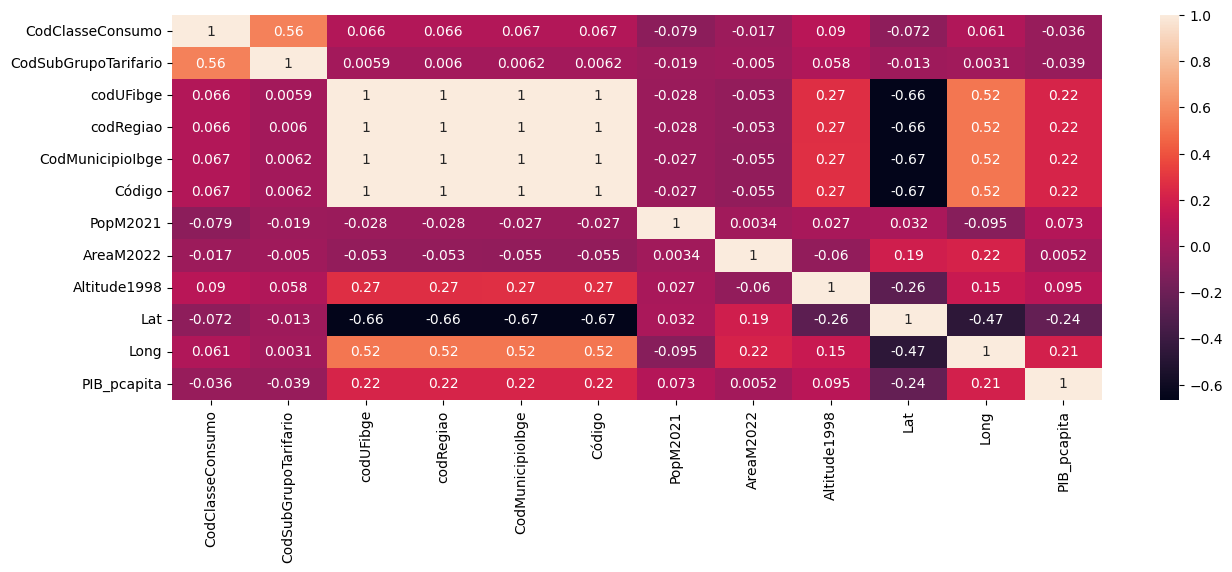

In [159]:
sns.heatmap(df_gd1.corr(), annot=True)